In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## IMPORTING CLUSTERED DATA

In [102]:
Raw=pd.read_csv(r'C:\Users\kakar\Downloads\DS Data sets\Realestate_with_clusters.csv')
Raw.head()

,price,Locality,Area,Possession Status,Furnishing Status,Number of Rooms,Number of Bathroom,Number of Parking,View /Facing,Floor No.,Additional Rooms,Age of Property (Years),Total Floor Count,clustering
0,104.00,Miyapur,1680.0,Ready To Move,Semi-Furnished,3,2,2,North,2.0,"Pooja Room,Study Room,Extra Room",0-1,5.0,low
1,104.00,Kondapur,1600.0,Ready To Move,Unfurnished,3,3,1,West,2.0,"Pooja Room,Study Room",0-1,5.0,low
2,69.46,Kollur,1579.0,Under Construction,Unfurnished,3,3,2,East,7.0,Pooja Room,0-1,15.0,low
3,113.00,Kondapur,1515.0,Ready To Move,Unfurnished,3,2,1,East,5.0,Pooja Room,0-1,5.0,low
4,46.00,Tolichowki,1100.0,Ready To Move,Unfurnished,2,2,1,East,2.0,Servant Room,0-1,5.0,premium


### Classification

In [3]:
df_class= Raw.copy()

In [4]:
df_class.head()

,price,Locality,Area,Possession Status,Furnishing Status,Number of Rooms,Number of Bathroom,Number of Parking,View /Facing,Floor No.,Additional Rooms,Age of Property (Years),Total Floor Count,clustering
0,104.00,Miyapur,1680.0,Ready To Move,Semi-Furnished,3,2,2,North,2.0,"Pooja Room,Study Room,Extra Room",0-1,5.0,low
1,104.00,Kondapur,1600.0,Ready To Move,Unfurnished,3,3,1,West,2.0,"Pooja Room,Study Room",0-1,5.0,low
2,69.46,Kollur,1579.0,Under Construction,Unfurnished,3,3,2,East,7.0,Pooja Room,0-1,15.0,low
3,113.00,Kondapur,1515.0,Ready To Move,Unfurnished,3,2,1,East,5.0,Pooja Room,0-1,5.0,low
4,46.00,Tolichowki,1100.0,Ready To Move,Unfurnished,2,2,1,East,2.0,Servant Room,0-1,5.0,premium


In [14]:
del df_class['price']

In [27]:
x_class=df_class.drop(['clustering'],axis=1)
x_class.head()

,Locality,Area,Possession Status,Furnishing Status,Number of Rooms,Number of Bathroom,Number of Parking,View /Facing,Floor No.,Additional Rooms,Age of Property (Years),Total Floor Count
0,Miyapur,1680.0,Ready To Move,Semi-Furnished,3,2,2,North,2.0,"Pooja Room,Study Room,Extra Room",0-1,5.0
1,Kondapur,1600.0,Ready To Move,Unfurnished,3,3,1,West,2.0,"Pooja Room,Study Room",0-1,5.0
2,Kollur,1579.0,Under Construction,Unfurnished,3,3,2,East,7.0,Pooja Room,0-1,15.0
3,Kondapur,1515.0,Ready To Move,Unfurnished,3,2,1,East,5.0,Pooja Room,0-1,5.0
4,Tolichowki,1100.0,Ready To Move,Unfurnished,2,2,1,East,2.0,Servant Room,0-1,5.0


In [28]:
y_class=df_class[['clustering']]
y_class.head()

,clustering
0,low
1,low
2,low
3,low
4,premium


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)

In [30]:
cats = pd.DataFrame(ohe.fit_transform(x_class.iloc[:,[0,2,3,7,9,10]]))

In [31]:
cats.head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
cats.columns = ohe.get_feature_names()

In [35]:
data=x_class.iloc[:,[1,4,5,6,8,11]]

In [36]:
x_class1 = pd.concat([data,cats], axis=1)

In [37]:
x_class1.head()

,Area,Number of Rooms,Number of Bathroom,Number of Parking,Floor No.,Total Floor Count,x0_A S Rao Nagar,x0_Abdullahpurmet,x0_Abids,x0_Addagutta,...,x4_Servant Room,"x4_Servant Room,Study Room","x4_Servant Room,Study Room,Extra Room",x4_Study Room,"x4_Study Room,Extra Room",x5_0-1,x5_10+,x5_2-4,x5_5-7,x5_8-10
0,1680.0,3,2,2,2.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1600.0,3,3,1,2.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1579.0,3,3,2,7.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1515.0,3,2,1,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1100.0,2,2,1,2.0,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
import joblib

joblib.dump(ohe,'ohe_class.joblib')

['ohe_class.joblib']

In [50]:
y_class['clustering']=y_class['clustering'].replace({'high':1,'low':0,'premium':2}) 

In [53]:
y_class.head()

,clustering
0,0
1,0
2,0
3,0
4,2


In [40]:
from sklearn .preprocessing import MinMaxScaler

In [41]:
scale = MinMaxScaler()

In [43]:
x_class1.iloc[:,:] = scale.fit_transform(x_class1.iloc[:,:])

In [44]:
x_class1.head()

,Area,Number of Rooms,Number of Bathroom,Number of Parking,Floor No.,Total Floor Count,x0_A S Rao Nagar,x0_Abdullahpurmet,x0_Abids,x0_Addagutta,...,x4_Servant Room,"x4_Servant Room,Study Room","x4_Servant Room,Study Room,Extra Room",x4_Study Room,"x4_Study Room,Extra Room",x5_0-1,x5_10+,x5_2-4,x5_5-7,x5_8-10
0,0.648962,0.5,0.2,0.2,0.058824,0.210526,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.598557,0.5,0.4,0.0,0.058824,0.210526,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.585326,0.5,0.4,0.2,0.352941,0.736842,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.545002,0.5,0.2,0.0,0.235294,0.210526,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.283527,0.0,0.2,0.0,0.058824,0.210526,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
joblib.dump(scale,'scale_mx_class.joblib')

['scale_mx_class.joblib']

# Testing & Training

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x_class1,y_class,test_size=0.30,random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


In [56]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)                       ##LOGISTIC
y_pred = classifier.predict(x_test)
confusion_matrix(y_pred,y_test)


array([[113,   6,   8],
       [  2,  70,   0],
       [ 25,   0, 370]], dtype=int64)

In [57]:
score1=accuracy_score(y_pred,y_test)



In [58]:
classifier1 = KNeighborsClassifier()
classifier1.fit(x_train,y_train)                       ##KNN-CLASSIFIER
y_pred1 = classifier1.predict(x_test)
confusion_matrix(y_pred1,y_test)



array([[ 86,  23,  18],
       [  8,  46,   0],
       [ 46,   7, 360]], dtype=int64)

In [59]:
score2=accuracy_score(y_pred1,y_test)


In [60]:

classifier2 = DecisionTreeClassifier()
classifier2.fit(x_train,y_train)                       ##DT-CLASSIFIER
y_pred2 = classifier2.predict(x_test)
confusion_matrix(y_pred2,y_test)


array([[140,   0,   0],
       [  0,  76,   0],
       [  0,   0, 378]], dtype=int64)

In [61]:
score3=accuracy_score(y_pred2,y_test)

In [62]:
classifier3 = SVC()
classifier3.fit(x_train,y_train)                       ##svc
y_pred3 = classifier3.predict(x_test)
confusion_matrix(y_pred3,y_test)


array([[103,   9,  14],
       [  3,  67,   0],
       [ 34,   0, 364]], dtype=int64)

In [63]:
score4=accuracy_score(y_pred3,y_test)

In [64]:
classifier4 = RandomForestClassifier()
classifier4.fit(x_train,y_train)                       ##rf-CLASSIFIER
y_pred4 = classifier4.predict(x_test)
confusion_matrix(y_pred4,y_test)

array([[139,   4,   2],
       [  1,  72,   0],
       [  0,   0, 376]], dtype=int64)

In [65]:
score5=accuracy_score(y_pred4,y_test)

In [66]:
classifier5 = GaussianNB()
classifier5.fit(x_train,y_train)                       
y_pred5 = classifier5.predict(x_test)               #GaussianNB   navies bayiee
confusion_matrix(y_pred5,y_test)

array([[ 17,   4, 116],
       [114,  69, 196],
       [  9,   3,  66]], dtype=int64)

In [67]:
score6=accuracy_score(y_pred5,y_test)

In [68]:
classifier6 = XGBClassifier()
classifier6.fit(x_train,y_train)                       ##xgb classfier
y_pred6 = classifier6.predict(x_test)
confusion_matrix(y_pred6,y_test)

array([[140,   0,   0],
       [  0,  76,   0],
       [  0,   0, 378]], dtype=int64)

In [69]:
score7=accuracy_score(y_pred6,y_test)

LR: 0.940404 (0.020177)
KNN: 0.824242 (0.054339)
CART: 1.000000 (0.000000)
NB: 0.258081 (0.072010)
SVM: 0.910101 (0.031281)
RF: 0.989899 (0.011736)
XGB: 1.000000 (0.000000)


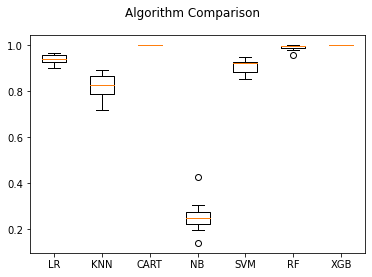

In [71]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(model, x_class1 , y_class, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
joblib.dump(classifier4,'RF_class.pkl')

['RF_class.pkl']

In [75]:
models=pd.DataFrame({'Model':['logistic regression','K-NEAREST NEIGHBOUR','DESSION TREE CLASSFIER','NAVIE BAYIES CLASSFIER','SUPPORTIVE VECTOR MACHIE','RANDOM FOREST CLASSFIER','XG-BOOST CLASSFIER'],
                     'Accuracy':[score1,score2,score3,score4,score6,score5,score7]
                    })

In [76]:
models

,Model,Accuracy
0,logistic regression,0.930976
1,K-NEAREST NEIGHBOUR,0.828283
2,DESSION TREE CLASSFIER,1.000000
3,NAVIE BAYIES CLASSFIER,0.898990
4,SUPPORTIVE VECTOR MACHIE,0.255892
5,RANDOM FOREST CLASSFIER,0.988215
6,XG-BOOST CLASSFIER,1.000000


# REGRESSION MODEL

multiple linear regression

# Train test split

In [77]:
x_reg=Raw.drop(['clustering','price'],axis=1)
x_reg.head()

,Locality,Area,Possession Status,Furnishing Status,Number of Rooms,Number of Bathroom,Number of Parking,View /Facing,Floor No.,Additional Rooms,Age of Property (Years),Total Floor Count
0,Miyapur,1680.0,Ready To Move,Semi-Furnished,3,2,2,North,2.0,"Pooja Room,Study Room,Extra Room",0-1,5.0
1,Kondapur,1600.0,Ready To Move,Unfurnished,3,3,1,West,2.0,"Pooja Room,Study Room",0-1,5.0
2,Kollur,1579.0,Under Construction,Unfurnished,3,3,2,East,7.0,Pooja Room,0-1,15.0
3,Kondapur,1515.0,Ready To Move,Unfurnished,3,2,1,East,5.0,Pooja Room,0-1,5.0
4,Tolichowki,1100.0,Ready To Move,Unfurnished,2,2,1,East,2.0,Servant Room,0-1,5.0


In [78]:
y_reg=Raw[['price']]
y_reg.head()

,price
0,104.00
1,104.00
2,69.46
3,113.00
4,46.00


In [81]:
oneht=joblib.load('ohe_class.joblib')

In [82]:
cats = pd.DataFrame(oneht.transform(x_reg.iloc[:,[0,2,3,7,9,10]]))

In [83]:
cats.columns = oneht.get_feature_names()

In [84]:
data=x_reg.iloc[:,[1,4,5,6,8,11]]

In [85]:
x_reg1 = pd.concat([data,cats], axis=1)

In [86]:
x_reg1

,Area,Number of Rooms,Number of Bathroom,Number of Parking,Floor No.,Total Floor Count,x0_A S Rao Nagar,x0_Abdullahpurmet,x0_Abids,x0_Addagutta,...,x4_Servant Room,"x4_Servant Room,Study Room","x4_Servant Room,Study Room,Extra Room",x4_Study Room,"x4_Study Room,Extra Room",x5_0-1,x5_10+,x5_2-4,x5_5-7,x5_8-10
0,1680.0,3,2,2,2.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1600.0,3,3,1,2.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1579.0,3,3,2,7.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1515.0,3,2,1,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1100.0,2,2,1,2.0,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1150.0,2,2,1,6.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1976,1110.0,2,2,2,2.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1977,1130.0,3,2,1,6.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1978,1292.0,2,2,2,1.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x_reg1,y_reg,test_size=0.2,random_state=0)

In [88]:
y_reg

,price
0,104.00
1,104.00
2,69.46
3,113.00
4,46.00
...,...
1975,63.25
1976,26.62
1977,36.32
1978,71.06


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred = model.predict(x_test)

In [91]:
y_pred

array([[ 6.73089600e+01],
       [ 8.15572510e+01],
       [ 4.64958496e+01],
       [ 6.80123291e+01],
       [-3.36283415e+09],
       [ 2.52138672e+01],
       [ 7.21771240e+01],
       [ 5.52169189e+01],
       [-3.36281084e+09],
       [ 6.93068848e+01],
       [ 4.77197266e+01],
       [ 4.04177246e+01],
       [ 9.54260254e+01],
       [ 8.03190918e+01],
       [ 1.13392700e+02],
       [ 1.13369629e+02],
       [ 5.20969238e+01],
       [ 5.77514648e+01],
       [ 4.20949707e+01],
       [ 2.49978027e+01],
       [ 3.89202881e+01],
       [ 3.42009277e+01],
       [ 2.49978027e+01],
       [ 6.08793945e+01],
       [ 5.70821533e+01],
       [ 4.68797607e+01],
       [ 2.83044434e+01],
       [ 9.21854248e+01],
       [ 1.16027710e+02],
       [ 9.57716064e+01],
       [ 5.95705566e+01],
       [ 1.10897461e+02],
       [ 7.97191162e+01],
       [ 4.74826660e+01],
       [ 2.37082520e+01],
       [ 1.10406494e+02],
       [ 5.79624023e+01],
       [ 5.95769043e+01],
       [ 2.7

In [93]:
y_test

,price
215,78.50
161,85.60
135,40.50
386,55.00
674,85.00
...,...
792,39.28
318,29.30
1902,60.00
621,61.87


In [94]:
len(y_test)

396

In [95]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print("r2 score value:", metrics.r2_score(y_test, y_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)- x_test.shape[1]-1))

Mean Squared Error: 2.413528116214706e+19
Root Mean Squared Error: 4912767159.366202
mean absolute error: 518798252.4319592
r2 score value: -2.8248508512749744e+16
Adjusted R^2: -6.803756623497652e+16


# RANDOM FOREST

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
model_2 = RandomForestRegressor()
model_2.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
y_pred = model_2.predict(x_test)
y_pred

array([ 77.9311    ,  74.7342    ,  40.4565    ,  70.9381    ,
        78.5159    ,  31.0398    ,  76.513     ,  63.1001    ,
        86.0569    ,  48.7289    ,  48.1646    ,  48.4183    ,
        87.45289333,  88.607     , 134.51566667, 100.4566    ,
        42.9798    ,  59.6242    ,  41.73898333,  30.21663333,
        39.2595    ,  44.56775   ,  30.21663333,  64.2789    ,
        56.258     ,  48.7952    ,  34.4725    ,  84.4911    ,
       134.525     , 102.2877    ,  59.55814286, 111.63245833,
        78.5784    ,  41.867325  ,  24.3439    ,  78.5084    ,
        56.02255   ,  55.12486   ,  33.02198   ,  31.5936    ,
        69.2001    ,  39.15      ,  41.46604279,  45.2522    ,
       111.844     ,  87.52644864,  60.8378    ,  51.1748    ,
       109.4392    , 100.9391    , 135.64      ,  85.7635    ,
       109.55346667,  90.856     , 135.285     ,  40.5591    ,
        29.39455357,  61.1564    ,  60.3984    ,  47.6989    ,
        56.44106667,  45.427     ,  27.3381    ,  70.55

In [99]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print("r2 score value:", metrics.r2_score(y_test, y_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)- x_test.shape[1]-1))

Mean Squared Error: 236.5317260528575
Root Mean Squared Error: 15.379587967590597
mean absolute error: 9.165720195414112
r2 score value: 0.7231576283677676
Adjusted R^2: 0.3332150195443184


In [100]:
joblib.dump(model_2,'RF_regression.pkl')

['RF_regression.pkl']